In [167]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/facial-emotion-recognition/emotions.csv
/kaggle/input/facial-emotion-recognition/images/7/Disgust.jpg
/kaggle/input/facial-emotion-recognition/images/7/Anger.jpg
/kaggle/input/facial-emotion-recognition/images/7/Sad.jpg
/kaggle/input/facial-emotion-recognition/images/7/Surprised.jpg
/kaggle/input/facial-emotion-recognition/images/7/Neutral.jpg
/kaggle/input/facial-emotion-recognition/images/7/Happy.jpg
/kaggle/input/facial-emotion-recognition/images/7/Fear.jpg
/kaggle/input/facial-emotion-recognition/images/7/Contempt.jpg
/kaggle/input/facial-emotion-recognition/images/17/Disgust.jpg
/kaggle/input/facial-emotion-recognition/images/17/Anger.jpg
/kaggle/input/facial-emotion-recognition/images/17/Sad.jpg
/kaggle/input/facial-emotion-recognition/images/17/Surprised.jpg
/kaggle/input/facial-emotion-recognition/images/17/Neutral.jpg
/kaggle/input/facial-emotion-recognition/images/17/Happy.jpg
/kaggle/input/facial-emotion-recognition/images/17/Fear.jpg
/kaggle/input/facial-emoti

In [168]:
import os
import random
import numpy as np
import pandas as pd
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical

# ****Loading Data

In [169]:
data = pd.read_csv("/kaggle/input/facial-emotion-recognition/emotions.csv")
data.head()

,set_id,gender,age,country
0,0,FEMALE,36,RU
1,1,FEMALE,37,RU
2,2,FEMALE,36,RU
3,3,MALE,29,RU
4,4,FEMALE,43,RU


In [170]:
print("The numbers of rows and columns of the data= ", data.shape)
print("Columns = ", data.columns)

The numbers of rows and columns of the data=  (19, 4)
Columns =  Index(['set_id', 'gender', 'age', 'country'], dtype='object')


In [171]:
files=os.listdir('/kaggle/input/facial-emotion-recognition/images/0')
emotions=[]
for f in  files:
    emotions+=[f.split('.')[0]]
class_names=sorted(emotions)
!mkdir images
for emo in emotions:
    !mkdir images/{emo}
!ls images

mkdir: cannot create directory ‘images’: File exists
mkdir: cannot create directory ‘images/Disgust’: File exists
mkdir: cannot create directory ‘images/Anger’: File exists
mkdir: cannot create directory ‘images/Sad’: File exists
mkdir: cannot create directory ‘images/Surprised’: File exists
mkdir: cannot create directory ‘images/Neutral’: File exists
mkdir: cannot create directory ‘images/Happy’: File exists
mkdir: cannot create directory ‘images/Fear’: File exists
mkdir: cannot create directory ‘images/Contempt’: File exists
Anger  Contempt  Disgust  Fear	Happy  Neutral	Sad  Surprised


In [172]:
for dirname, _, filenames in os.walk('/kaggle/input/facial-emotion-recognition/images'):
    for filename in filenames:
        path=os.path.join(dirname, filename)
        emo=filename.split('.')[0]
        idi=dirname.split('/')[-1]
        newfile=idi+'_'+filename
        !cp {path} {os.path.join('images',emo,newfile)}

In [173]:
tpath = '/kaggle/working/images'

# ****Data augmentation and normalization

In [174]:
training_data = keras.preprocessing.image_dataset_from_directory(
    tpath,
    batch_size = 4,
    image_size =(351,351),

    shuffle = True,
    seed =123,
    subset ='training',
    validation_split=0.2
    )
validation_data =keras.preprocessing.image_dataset_from_directory(
    tpath,
    batch_size = 4,
    image_size =(351,351),

    shuffle = True,
    seed =123,
    validation_split =0.2,
    subset ='validation'
    
    )

Found 152 files belonging to 8 classes.
Using 122 files for training.
Found 152 files belonging to 8 classes.
Using 30 files for validation.


In [175]:
resnet_model = Sequential()

pretrained_model= keras.applications.ResNet50(include_top=False,
                   input_shape=(351,351,3),
                   pooling='avg',classes=8,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(Dense(8, activation='softmax'))

In [176]:
resnet_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=0.0001), metrics=['accuracy'])

# ****MODELLING

In [177]:
resnet_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_15 (Dense)            (None, 8)                 8200      
                                                                 
Total params: 25,694,088
Trainable params: 2,106,376
Non-trainable params: 23,587,712
_________________________________________________________________


In [178]:
epochs=10
history = resnet_model.fit(
    
  training_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/10
31/31 [==============================] - 16s 256ms/step - loss: 2.8866 - accuracy: 0.1066 - val_loss: 3.0265 - val_accuracy: 0.0667
Epoch 2/10
31/31 [==============================] - 9s 246ms/step - loss: 2.3825 - accuracy: 0.0738 - val_loss: 2.9493 - val_accuracy: 0.0667
Epoch 3/10
31/31 [==============================] - 8s 212ms/step - loss: 2.0616 - accuracy: 0.1721 - val_loss: 2.9158 - val_accuracy: 0.1333
Epoch 4/10
31/31 [==============================] - 8s 213ms/step - loss: 1.9356 - accuracy: 0.1967 - val_loss: 2.8692 - val_accuracy: 0.0333
Epoch 5/10
31/31 [==============================] - 8s 216ms/step - loss: 1.8248 - accuracy: 0.2377 - val_loss: 3.1084 - val_accuracy: 0.0000e+00
Epoch 6/10
31/31 [==============================] - 9s 252ms/step - loss: 1.7124 - accuracy: 0.2869 - val_loss: 3.1804 - val_accuracy: 0.0333
Epoch 7/10
31/31 [==============================] - 8s 209ms/step - loss: 1.6822 - accuracy: 0.3770 - val_loss: 3.1671 - val_accuracy: 0.0000e+

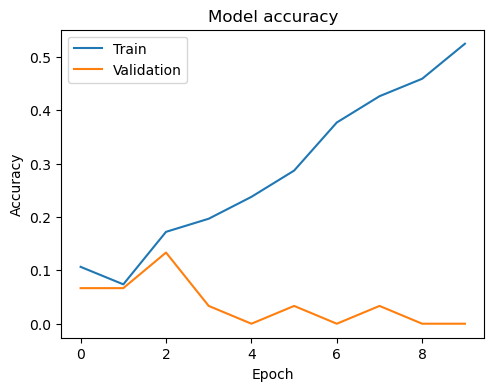

In [179]:
# Plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

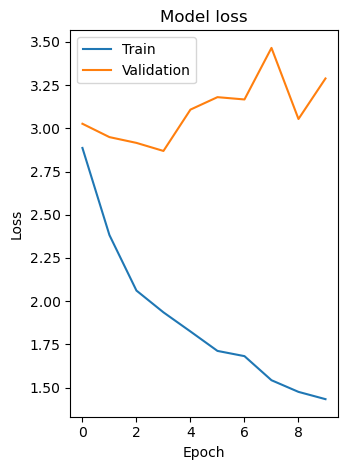

In [180]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()